In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, roc_auc_score, f1_score, roc_curve, precision_recall_curve,auc
import warnings
warnings.filterwarnings("ignore")
import pickle

In [2]:
X = pd.read_csv('../data/processed/X_balmix_cat_mean.csv')
y = pd.read_csv('../data/processed/y_balmix_cat_mean.csv')

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(10849, 15)
(2713, 15)
(10849, 1)
(2713, 1)


In [5]:
train = pd.concat([X_train, pd.DataFrame(y_train, columns=['loan_status'])], axis=1)



In [6]:
train

,term,int_rate,installment,emp_length,home_ownership,annual_inc,purpose,dti,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,loan_status
11676,0.560763,8.90,139.72,0.520332,0.479546,44000.0,0.473215,22.94,0.500914,4318.0,58.4,0.497006,0.498455,0.483154,0.500871,1
3747,0.560763,15.31,139.27,0.506836,0.479546,15000.0,0.473215,31.20,0.500914,4328.0,92.1,0.492647,0.498455,0.483154,0.500871,0
4911,0.560763,6.62,313.18,0.513181,0.523856,111800.0,0.581884,9.30,0.500914,32387.0,40.5,0.518519,0.498455,0.542182,0.500871,1
6451,0.560763,8.90,698.58,0.528529,0.523856,100000.0,0.575362,9.42,0.500914,12781.0,63.9,0.509804,0.520723,0.541608,0.500871,1
9548,0.560763,9.76,437.31,0.520332,0.479546,36096.0,0.473215,27.26,0.500914,3174.0,43.5,0.477064,0.498455,0.483154,0.500871,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,0.560763,17.77,540.56,0.490360,0.523856,120000.0,0.581884,23.04,0.500914,21623.0,62.2,0.505263,0.498455,0.542182,0.500871,1
3264,0.273930,24.83,468.03,0.506836,0.523856,70000.0,0.522876,15.72,0.500914,11401.0,57.6,0.571429,0.498455,0.493500,0.500871,0
9845,0.560763,14.09,492.79,0.513181,0.479546,109000.0,0.473215,31.58,0.500914,21930.0,69.2,0.512953,0.498455,0.541608,0.500871,1
10799,0.560763,16.29,317.71,0.490360,0.523856,43000.0,0.473215,11.55,0.500914,8767.0,63.1,0.506958,0.498455,0.536383,0.500871,1


In [7]:
test = pd.concat([X_test, pd.DataFrame(y_test, columns=['loan_status'])], axis=1)

In [8]:
test

,term,int_rate,installment,emp_length,home_ownership,annual_inc,purpose,dti,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,loan_status
1861,0.560763,8.90,79.39,0.502326,0.479546,21000.0,0.581884,26.23,0.500914,16146.0,80.3,0.485411,0.498455,0.483154,0.500871,1
11971,0.560763,15.81,315.57,0.490360,0.479546,45000.0,0.473215,10.69,0.500914,6599.0,88.0,0.470930,0.498455,0.483154,0.500871,0
10411,0.560763,15.31,633.68,0.484797,0.479546,61000.0,0.473215,17.06,0.500914,3698.0,88.0,0.492647,0.498455,0.541608,0.500871,1
3998,0.560763,22.45,783.85,0.493506,0.479546,70000.0,0.575362,21.72,0.500914,18596.0,93.9,0.501916,0.498455,0.541608,0.500871,0
2686,0.560763,12.69,161.02,0.493506,0.523856,48000.0,0.575362,4.00,0.472684,1361.0,64.8,0.484076,0.498455,0.497404,0.470255,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5540,0.560763,10.65,309.45,0.479567,0.523856,30000.0,0.581884,19.84,0.500914,9311.0,50.9,0.479532,0.498455,0.497404,0.500871,1
2579,0.560763,21.49,830.61,0.520332,0.479546,65000.0,0.473215,13.89,0.500914,17298.0,71.5,0.477064,0.498455,0.483154,0.500871,0
882,0.560763,18.75,484.02,0.493506,0.479546,85000.0,0.581884,5.27,0.500914,6121.0,69.5,0.525234,0.498455,0.483154,0.500871,1
2576,0.560763,12.12,665.44,0.502326,0.479546,90000.0,0.473215,13.68,0.500914,16205.0,85.3,0.509890,0.498455,0.483154,0.500871,1


In [9]:
train.to_csv('../data/train/train_balmix_cat_mean.csv', index=False)
test.to_csv('../data/test/test_balmix_cat_mean.csv', index=False)

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scal = scaler.fit_transform(X_train)
X_test_scal = scaler.transform(X_test)

In [11]:
gbc = GradientBoostingClassifier(n_estimators=100, random_state=0)

In [12]:
parameters = {"n_estimators":[50,100,150],
              "max_depth": [2,3,4,5],
              "max_features": [2,3,4],
              "learning_rate":[0.01,0.1,0.5]}

gbc_gs = GridSearchCV(GradientBoostingClassifier(), parameters, cv=5, scoring="roc_auc", n_jobs=-1, verbose=2)

gbc_gs.fit(X_train_scal, y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [2, 3, 4, 5], 'max_features': [2, 3, 4],
                         'n_estimators': [50, 100, 150]},
             scoring='roc_auc', verbose=2)

In [13]:
print(gbc_gs.best_estimator_)
print(gbc_gs.best_params_)
print(gbc_gs.best_score_)

GradientBoostingClassifier(max_depth=2, max_features=3, n_estimators=150)
{'learning_rate': 0.1, 'max_depth': 2, 'max_features': 3, 'n_estimators': 150}
0.691353235954515


In [14]:
final_gbc = gbc_gs.best_estimator_
final_gbc.fit(X_train_scal, y_train)
y_pred = final_gbc.predict(X_test_scal)



In [15]:
print("accuracy_score", accuracy_score(y_test, y_pred))
print("recall_score", recall_score(y_test, y_pred))
print("precision_score", precision_score(y_test, y_pred))
print("roc_auc_score", roc_auc_score(y_test, y_pred))
print("f1_score", f1_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

accuracy_score 0.6354589015849613
recall_score 0.6429096252755327
precision_score 0.634978229317852
roc_auc_score 0.6354341025785948
f1_score 0.6389193136181088
[[849 503]
 [486 875]]


In [16]:
results = cross_val_score(final_gbc, X, y, cv=10, scoring="roc_auc")
print(results)
print(results.mean())
print(results.std())

[0.70031627 0.6918349  0.6872482  0.70729893 0.7042142  0.67790482
 0.68390895 0.69112586 0.6837893  0.66525156]
0.6892892990624448
0.01203881177969272


In [17]:
final_gbc.feature_importances_

array([2.71145246e-01, 3.45049591e-01, 4.60286270e-02, 5.53291497e-03,
       1.32365811e-02, 1.29018340e-01, 5.53645279e-02, 4.59683319e-02,
       1.21325802e-04, 2.44998504e-02, 2.55690456e-02, 2.57065900e-02,
       6.85395807e-04, 1.13930206e-02, 6.80612662e-04])

In [18]:
X_train.columns

Index(['term', 'int_rate', 'installment', 'emp_length', 'home_ownership',
       'annual_inc', 'purpose', 'dti', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'initial_list_status', 'mort_acc', 'pub_rec_bankruptcies'],
      dtype='object')

<Axes: >

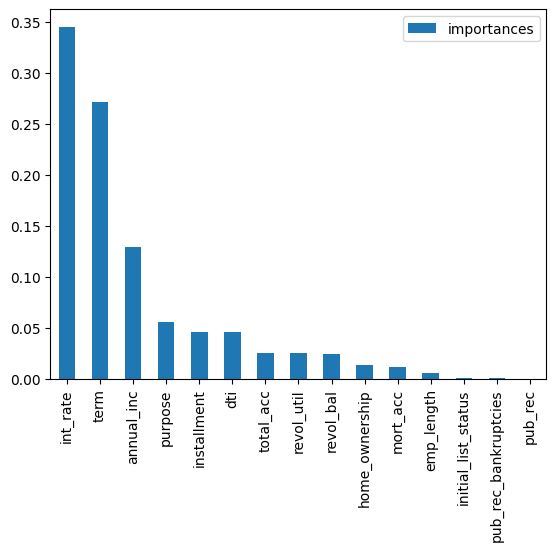

In [19]:
df_imp = pd.DataFrame({"importances":final_gbc.feature_importances_}, index=X_train.columns).sort_values("importances", ascending=False)
df_imp.plot(kind="bar")

In [20]:

    
# with open('gbc_roc_auc271123.pkl', "wb") as archivo_salida:
#     pickle.dump(final_gbc, archivo_salida)
